# Library

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [32]:
apo_D303_file  = 'data/Apo_SB_and_HB_of_D303_stage_11_to_65.dat'
holo_D303_file = 'data/Holo_SB_and_HB_of_D303_stage_21_to_42.dat'
apo_D4_file    = 'data/Apo_HB_D4_stage_11_to_65.dat'
holo_D4_file   = 'data/Holo_HB_D4_stage_21_to_42.dat'

# Collect Data

In [33]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [np.float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [34]:
apo_D303_data  = data_collect(apo_D303_file)
holo_D303_data = data_collect(holo_D303_file)
apo_D4_data    = data_collect(apo_D4_file)
holo_D4_data   = data_collect(holo_D4_file)

# Plot Data Settings

## Colors

In [39]:
Color1 = ('#00FF17') # Green 
Color2 = ('#0069FF') # Blue
Color3 = ('#FF00E8') # Pink 
Color4 = ('#FF9700') # Orange 
Colors = [Color1, Color2, Color3, Color4]

## Global Settings

In [40]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [41]:
ink_x = 1.5 # 1.4
ink_y = 1.2 # 1.4

ink_markersize  = 2
ink_linewidth = 0.5

# Make Hydrogen Bond Count Plots

## Plot D303 Salt-Bridge Interactions

### Plot With Labels

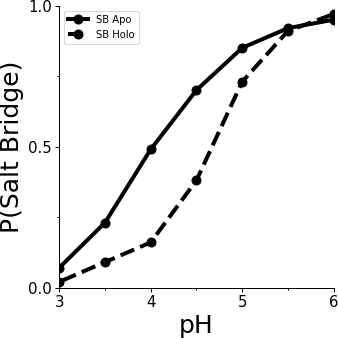

In [61]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_D303_data], [y[1] for y in apo_D303_data], 'o-', color='Black', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_D303_data], [y[1] for y in holo_D303_data], 'o--', color='Black', markersize=9, linewidth=4)
# The hydrogen 
#axes.plot([x[0] for x in apo_D303_data], [y[2] for y in apo_D303_data], 'o-', color='Red', markersize=9, linewidth=4)
#axes.plot([x[0] for x in apo_D303_data], [y[2] for y in holo_D303_data], 'o--', color='Red', markersize=9, linewidth=4)


# plot labels
legend = ['SB Apo', 'SB Holo', 'HB Apo', 'HB Holo']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(Salt Bridge)', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(3, 6)
axes.set_xticks([3, 4, 5, 6])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plot without labels

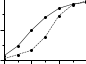

In [58]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_D303_data], [y[1] for y in apo_D303_data], 'o-', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_D303_data], [y[1] for y in holo_D303_data], 'o--', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)



# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(3, 6)
axes.set_xticks([3, 4, 5, 6])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/D303_SB_interaction.png", dpi=360, transparent=True)
plt.show()

## Plot D4 Hydrogen Bond Interactions

### Plots with Label

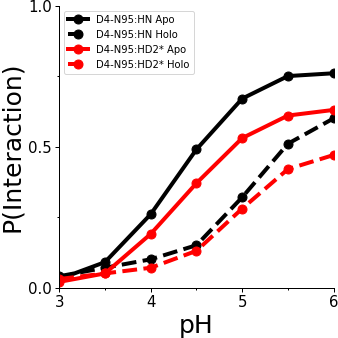

In [54]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
# D4 - N95:HN
axes.plot([x[0] for x in apo_D4_data], [y[1] for y in apo_D4_data], 'o-', color='Black', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_D4_data], [y[1] for y in holo_D4_data], 'o--', color='Black', markersize=9, linewidth=4)
# D4 - N95:HD2*
axes.plot([x[0] for x in apo_D4_data], [y[2] for y in apo_D4_data], 'o-', color='Red', markersize=9, linewidth=4)
axes.plot([x[0] for x in apo_D4_data], [y[2] for y in holo_D4_data], 'o--', color='Red', markersize=9, linewidth=4)
# D4 - N5:HN # This interaction is rather minor compared to the N96 SC and BB interactions
#axes.plot([x[0] for x in apo_D4_data], [y[3] for y in apo_D4_data], 'o-', color='Blue', markersize=9, linewidth=4)
#axes.plot([x[0] for x in apo_D4_data], [y[3] for y in holo_D4_data], 'o--', color='Blue', markersize=9, linewidth=4)


# plot labels
legend = ['D4-N95:HN Apo', 'D4-N95:HN Holo', 'D4-N95:HD2* Apo', 'D4-N95:HD2* Holo', 'D4-N5:HN Apo', 'D4-N5:HN Holo']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(Interaction)', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(3, 6)
axes.set_xticks([3, 4, 5, 6])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plot without Label

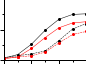

In [59]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
# D4 - N95:HN
axes.plot([x[0] for x in apo_D4_data], [y[1] for y in apo_D4_data], 'o-', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_D4_data], [y[1] for y in holo_D4_data], 'o--', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
# D4 - N95:HD2*
axes.plot([x[0] for x in apo_D4_data], [y[2] for y in apo_D4_data], 'o-', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_D4_data], [y[2] for y in holo_D4_data], 'o--', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)


# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(3, 6)
axes.set_xticks([3, 4, 5, 6])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/D4_HB_interactions.png", dpi=360, transparent=True)
plt.show()